<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null object
dtypes: int64(6), object(1)
memory usage: 94.6+ KB


            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      2.500000     2.500000     3.500000     3.666667     2.000000   
std       1.118358     1.118358     1.118358     1.247580     0.816733   
min       1.000000     1.000000     2.000000     2.000000     1.000000   
25%       1.750000     1.750000     2.750000     2.000000     1.000000   
50%       2.500000     2.500000     3.500000     4.000000     2.000000   
75%       3.250000     3.250000     4.250000     5.000000     3.000000   
max       4.000000     4

([<matplotlib.axis.XTick at 0x19dc00dba08>,
 <a list of 19 Text xticklabel objects>)

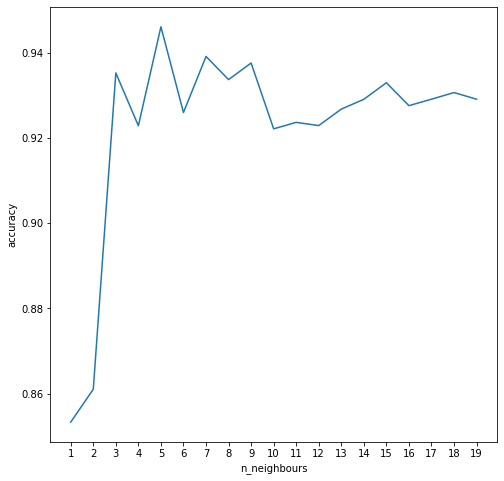

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

#Loading the Dataset From CSV file to df
df = pd.read_csv('C:/Users/Chittineni/Downloads/car2.csv')

#Dropping the id column
df.replace ('?', 999, inplace=True)
df.drop(['id'], 1, inplace=True)

#Columns of the data set
df.info()
print("\n")
print(df.describe())

#Displaying the different attribute values of each independant variable/feature
print("\nThe unique values in each column:")
for i in df.columns:
    print(i, ":", df[i].unique())

#Printing the Counts for each attribute
print("\nCounts for Each Attribute: \n")
for i in df.columns:
    print(i,"",df[i].value_counts())    
    
X = np.array(df.drop(['class'], 1))
y = np.array(df['class']) 

#Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Training the Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
y_pred = knn.fit(X_train, y_train).predict(X_test)

print("\nTraining Accuracy: ",knn.score(X_train, y_train))
print("\nTesting Accuracy",knn.score(X_test, y_test))
print("\nClassification Report: \n",classification_report(y_test,pred))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,y_pred))

#For predicting with the a data column
data = np.array([2,2,2,4,3,3])
prediction = knn.predict(data.reshape(1,-1))
print("\nPrediction of the Given Dataset:",prediction)

avg_score=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())
    
#Printing the Average Accuracy of all the Neighbours
print('\nAverage score:',score.mean())

#Plotting the Figure
plt.figure(figsize=(8,8))
plt.plot(range(1,20),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
plt.xticks(range(1,20,1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null object
dtypes: int64(6), object(1)
memory usage: 94.6+ KB


            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      2.500000     2.500000     3.500000     3.666667     2.000000   
std       1.118358     1.118358     1.118358     1.247580     0.816733   
min       1.000000     1.000000     2.000000     2.000000     1.000000   
25%       1.750000     1.750000     2.750000     2.000000     1.000000   
50%       2.500000     2.500000     3.500000     4.000000     2.000000   
75%       3.250000     3.250000     4.250000     5.000000     3.000000   
max       4.000000     4

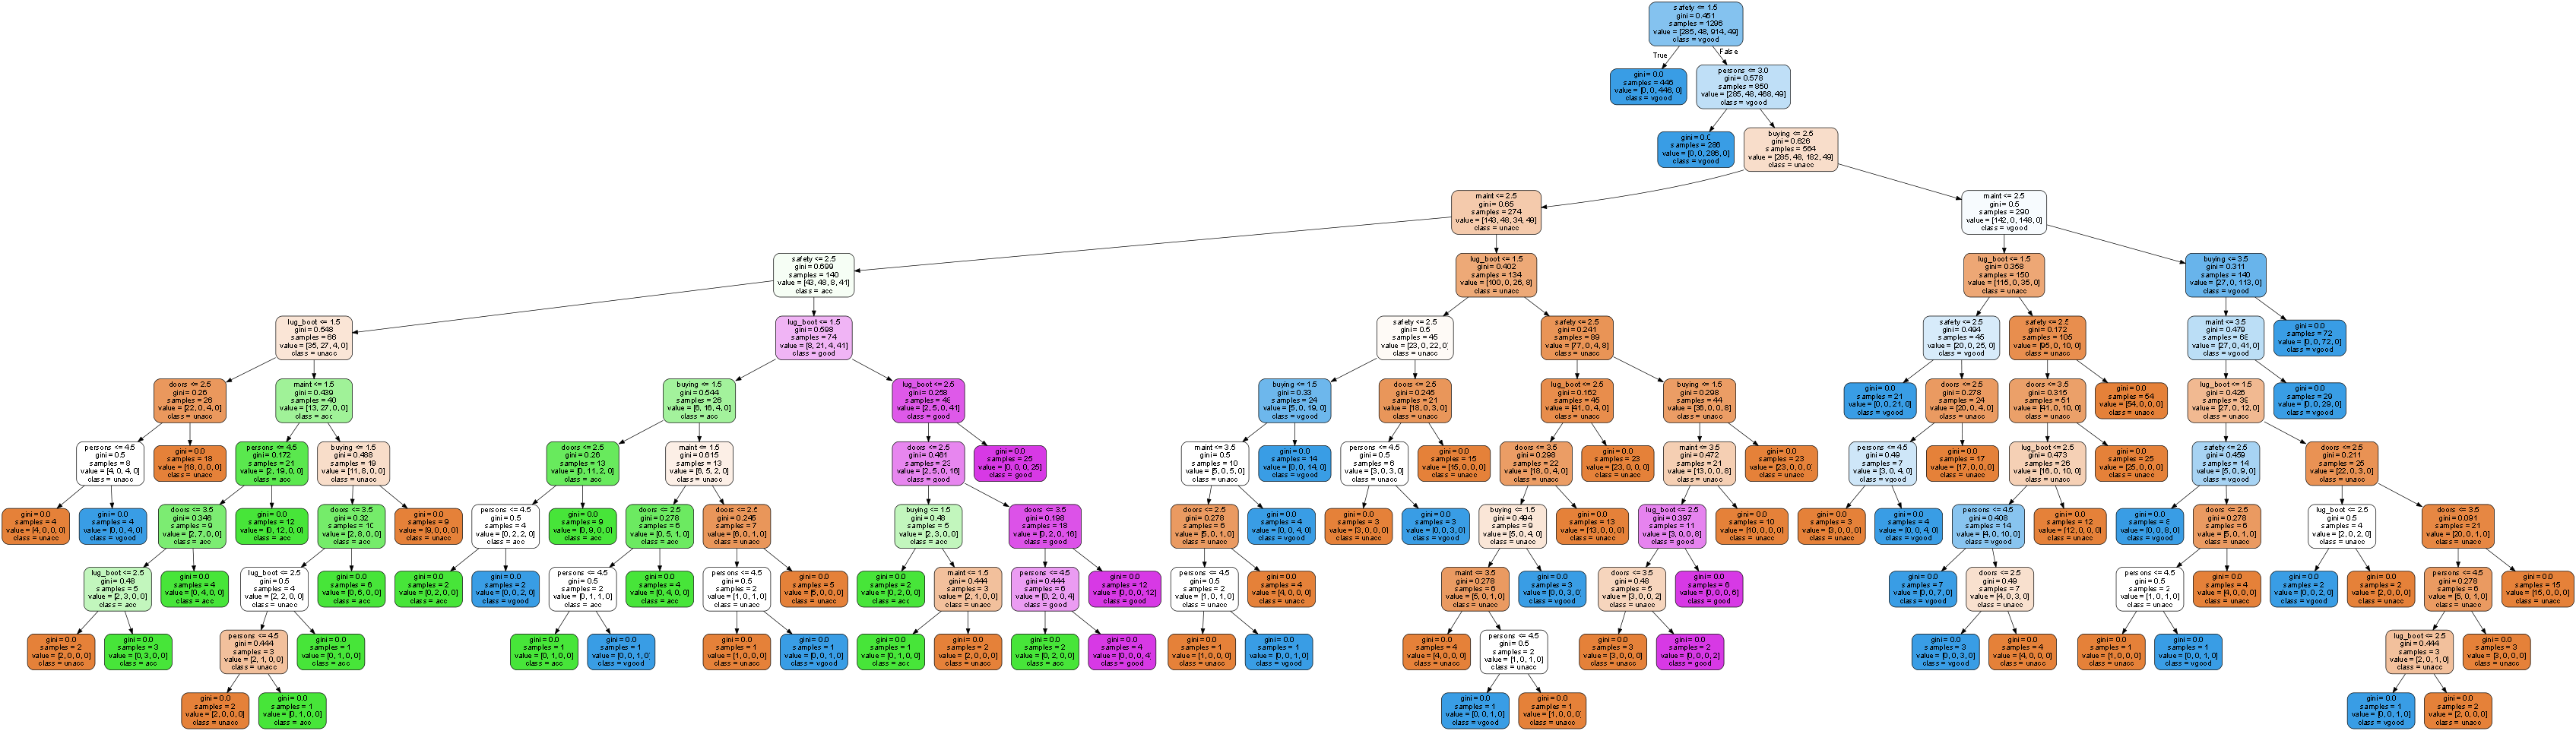

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from IPython.display import Image  
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import pydot
import graphviz

#Loading the Dataset From CSV file to df
df = pd.read_csv('C:/Users/Chittineni/Downloads/car2.csv')

#Dropping the id column
df.replace ('?', 999, inplace=True)
df.drop(['id'], 1, inplace=True)

#Columns of the data set
df.info()
print("\n")
print(df.describe())

#Displaying the different attribute values of each independant variable/feature
print("\nThe unique values in each column:")
for i in df.columns:
    print(i, ":", df[i].unique())

#Printing the Counts for each attribute
print("\nCounts for Each Attribute: \n")
for i in df.columns:
    print(i,"",df[i].value_counts())
    
X = np.array(df.drop(['class'], 1))
y = np.array(df['class']) 

#Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

#Training  the model
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
y_pred = tree.fit(X_train, y_train).predict(X_test)

print('\nTraining Accuracy:',tree.score(X_train,y_train))
print('\nTesting Accuracy: ', tree.score(X_test,y_test))
print('\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\nClassification Report: \n', classification_report(y_test,pred))

#For predicting with the a Data Column
prediction = tree.predict([[2,2,2,4,3,3]])
print("\nPrediction of the Given Dataset:",prediction)

#Printing the Features of the tree
features = list(df.columns[:-1])
target = df['class'].unique()
print("\nFeatures: ", features)
print("\nTarget: ", target)

# Exporting the decision tree in DOT format as 'tree.dot'
export_graphviz(tree, out_file='tree.dot', feature_names = features, class_names = target, 
                rounded = True, proportion = False, filled = True)

# Converting the dot file into a graph image as 'tree.png'
!dot -Tpng tree.dot -o tree.png -Gdpi=50 

# Displaying the tree
Image(filename = 'tree.png')   

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

#Loading the Dataset From CSV file to df
df = pd.read_csv('C:/Users/Chittineni/Downloads/car2.csv')

#Dropping the id column
df.replace ('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1))
y = np.array(df['class']) 

#Columns of the data set
df.info()
print("\n")
print(df.describe())

#Displaying the different attribute values of each independant variable/feature
print("\nThe unique values in each column:")
for i in df.columns:
    print(i, ":", df[i].unique())

#Printing the Counts for each attribute
print("\nCounts for Each Attribute: \n")
for i in df.columns:
    print(i,"",df[i].value_counts())

X = np.array(df.drop(['class'], 1))
y = np.array(df['class']) 

#Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

#Training  the model
lr=LogisticRegression(solver='newton-cg',multi_class='multinomial')
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
y_pred = lr.fit(X_train,y_train).predict(X_test)

print('\nTraining Accuracy:',lr.score(X_train,y_train))
print('\nTesting Accuracy: ', lr.score(X_test,y_test))
print('\nConfusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\nClassification Report: \n', classification_report(y_test,pred))

#For predicting with the a data column
data = np.array([2,2,2,4,3,3])
prediction = lr.predict(data.reshape(1,-1))
print("\nPrediction of the Given Dataset:",prediction)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null object
dtypes: int64(6), object(1)
memory usage: 94.6+ KB


            buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      2.500000     2.500000     3.500000     3.666667     2.000000   
std       1.118358     1.118358     1.118358     1.247580     0.816733   
min       1.000000     1.000000     2.000000     2.000000     1.000000   
25%       1.750000     1.750000     2.750000     2.000000     1.000000   
50%       2.500000     2.500000     3.500000     4.000000     2.000000   
75%       3.250000     3.250000     4.250000     5.000000     3.000000   
max       4.000000     4